# Insecticide resistance

Notebook for strain and insecticide resistance classification

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
## library
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import seaborn as sn
import numpy as np

sys.path.append('/Users/mauropazmino/Documents/chapter_2/src')
from preprocessing import baseline_gridsearch
from preprocessing import prepo_results_windows
from preprocessing import final_df_preprocessing
from preprocessing import boxplot_preprocessing

from preprocessing import baseline_gridsearch_MSC
from preprocessing import baseline_gridsearch_RNV
from preprocessing import baseline_gridsearch_SNV

from optimization import model_optimization_LR

from evaluation import model_evaluation

In [3]:
# load data
X = pd.read_csv("/Users/mauropazmino/Documents/chapter_2/data/processed/X_status.csv")
y = pd.read_csv("/Users/mauropazmino/Documents/chapter_2/data/processed/y_status.csv")

In [4]:
# binary labels
lb = LabelBinarizer()
y_encoded = lb.fit_transform(y)

In [5]:
# train test split
seed = 7
seed_2 = 9
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y_encoded, test_size=0.2,stratify=y,random_state=seed_2)

## Baseline perfomance of different ML algoritms with different preprocessing methods

I calculate the baseline perfomance of various ML models with different preprocessing methods and smoothing windows: RNV, SNV, MSC and standard scaler

In [6]:
# define the windows for savgol smoothing
windows=[9,11,21]

In [7]:
# raw

total_zero_order = []
for i in windows: 
    scores = baseline_gridsearch(X_tr, y_tr,i,0)
    total_zero_order.append(scores)

total_first_order = []
for i in windows: 
    scores = baseline_gridsearch(X_tr, y_tr,i,1)
    total_first_order.append(scores)

total_second_order = []
for i in windows: 
    scores = baseline_gridsearch(X_tr, y_tr,i,2)
    total_second_order.append(scores)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [96]:
# SNV
snv_first_order = []
for i in windows: 
    scores = baseline_gridsearch_SNV(X_tr, y_tr,i,1)
    snv_first_order.append(scores)

snv_second_order = []
for i in windows: 
    scores = baseline_gridsearch_SNV(X_tr, y_tr,i,2)
    snv_second_order.append(scores)

snv_zero_order = []
for i in windows: 
    scores = baseline_gridsearch_SNV(X_tr, y_tr,i,0)
    snv_zero_order.append(scores)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [97]:
# RNV
rnv_zero_order = []
for i in windows: 
    scores = baseline_gridsearch_RNV(X_tr, y_tr,i,0)
    rnv_zero_order.append(scores)

rnv_first_order = []
for i in windows: 
    scores = baseline_gridsearch_RNV(X_tr, y_tr,i,1)
    rnv_first_order.append(scores)

rnv_second_order = []
for i in windows: 
    scores = baseline_gridsearch_RNV(X_tr, y_tr,i,2)
    rnv_second_order.append(scores)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [98]:
# MSC
msc_zero_order = []
for i in windows: 
    scores = baseline_gridsearch_MSC(X_tr, y_tr,i,0)
    msc_zero_order.append(scores)

msc_first_order = []
for i in windows: 
    scores = baseline_gridsearch_MSC(X_tr, y_tr,i,1)
    msc_first_order.append(scores)

msc_second_order = []
for i in windows: 
    scores = baseline_gridsearch_MSC(X_tr, y_tr,i,2)
    msc_second_order.append(scores)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [104]:
# Join the results for each preprocessing
raw_results = prepo_results_windows(total_zero_order, total_first_order, total_second_order,"raw")
snv_results = prepo_results_windows(snv_zero_order , snv_first_order, snv_second_order,"snv" )
rnv_results = prepo_results_windows(rnv_zero_order, rnv_first_order, rnv_first_order, "rnv")
msc_results = prepo_results_windows(msc_zero_order, msc_first_order, msc_second_order, "msc")

In [105]:
# concatenate all the preprocessing metdhos
dataframes = [raw_results, snv_results, rnv_results, msc_results]
df_concat = pd.concat(dataframes)

In [106]:
# change column names, tranform to long format and export to csv
preprocesing_final_results = final_df_preprocessing(df_concat)
preprocesing_final_results.to_csv("/Users/mauropazmino/Documents/chapter_2/results/preprocessing_baseline_status_insectres.csv")

In [107]:
## NEED TO SHOW MORE MODELS TO CHOOSE LR TO HAVE 
preprocessing_results_df=preprocesing_final_results.groupby(["Model", "Preprocessing","Derivative", "Window"])["Accuracy"].mean().reset_index()
bestmodel = preprocessing_results_df.loc[preprocessing_results_df["Accuracy"].idxmax()]
print("Best model is:\n", bestmodel)

Best model is:
 Model                 SVC
Preprocessing         raw
Derivative              1
Window                 11
Accuracy         0.771014
Name: 265, dtype: object


In [108]:
preprocessing_results_df.sort_values('Accuracy', ascending=False).head(20)

,Model,Preprocessing,Derivative,Window,Accuracy
265,SVC,raw,1,11,0.771014
264,SVC,raw,1,9,0.769565
266,SVC,raw,1,21,0.768116
121,LR,raw,1,11,0.765217
120,LR,raw,1,9,0.763768
269,SVC,raw,2,21,0.760870
122,LR,raw,1,21,0.760870
193,RF,raw,1,11,0.757971
194,RF,raw,1,21,0.755072
268,SVC,raw,2,11,0.753623


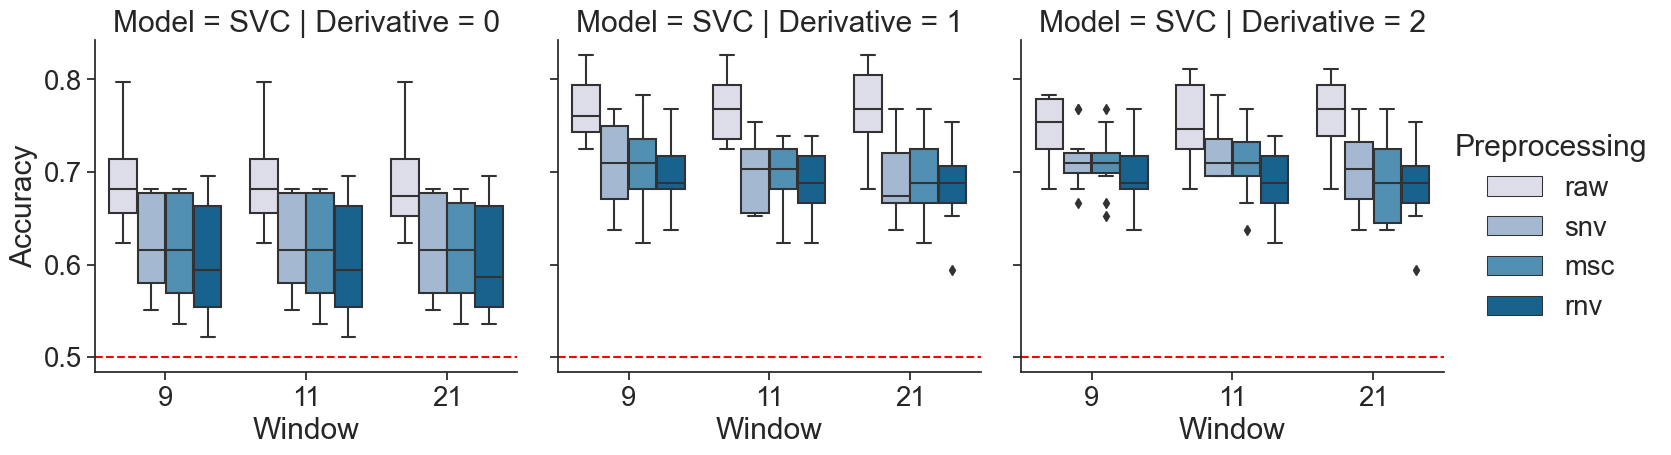

In [111]:
boxplot_preprocessing(preprocesing_final_results.loc[(preprocesing_final_results['Model'] == 'SVC')])

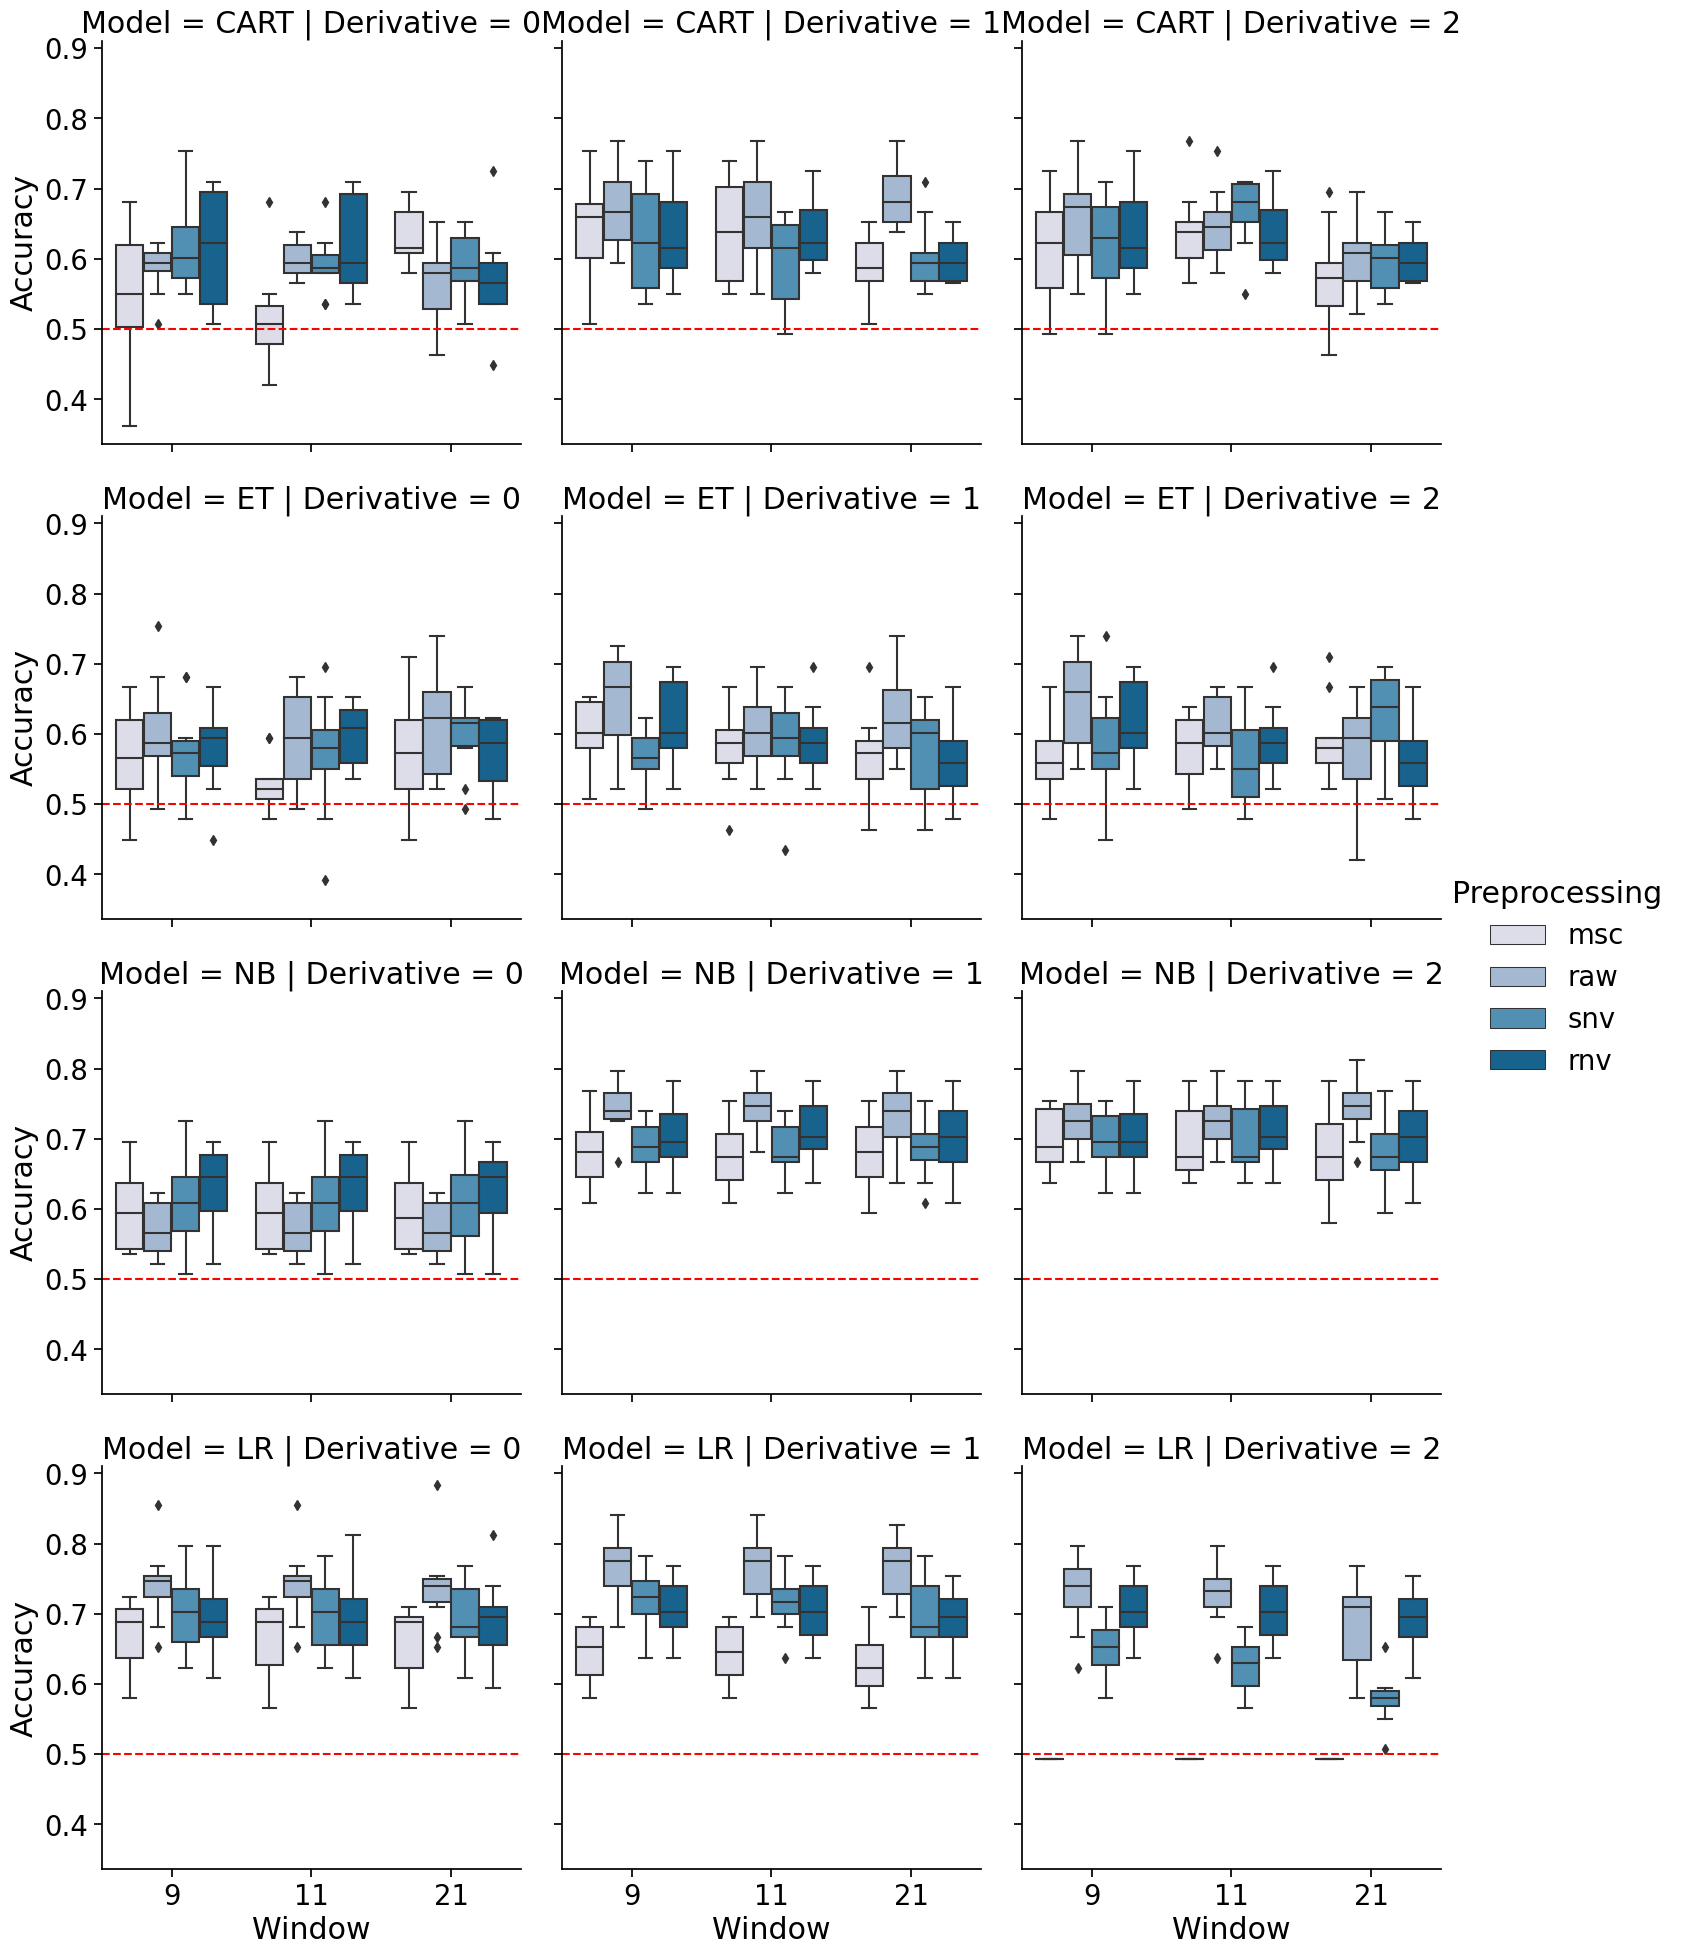

In [16]:
boxplot_preprocessing(preprocesing_final_results.loc[preprocesing_final_results['Model'].isin(['LR','CART','ET', 'NB'])])
plt.savefig("/Users/mauropazmino/Documents/chapter_2/plots/preprocessing_baseline_InsRes_pt1", bbox_inches="tight", dpi=300)

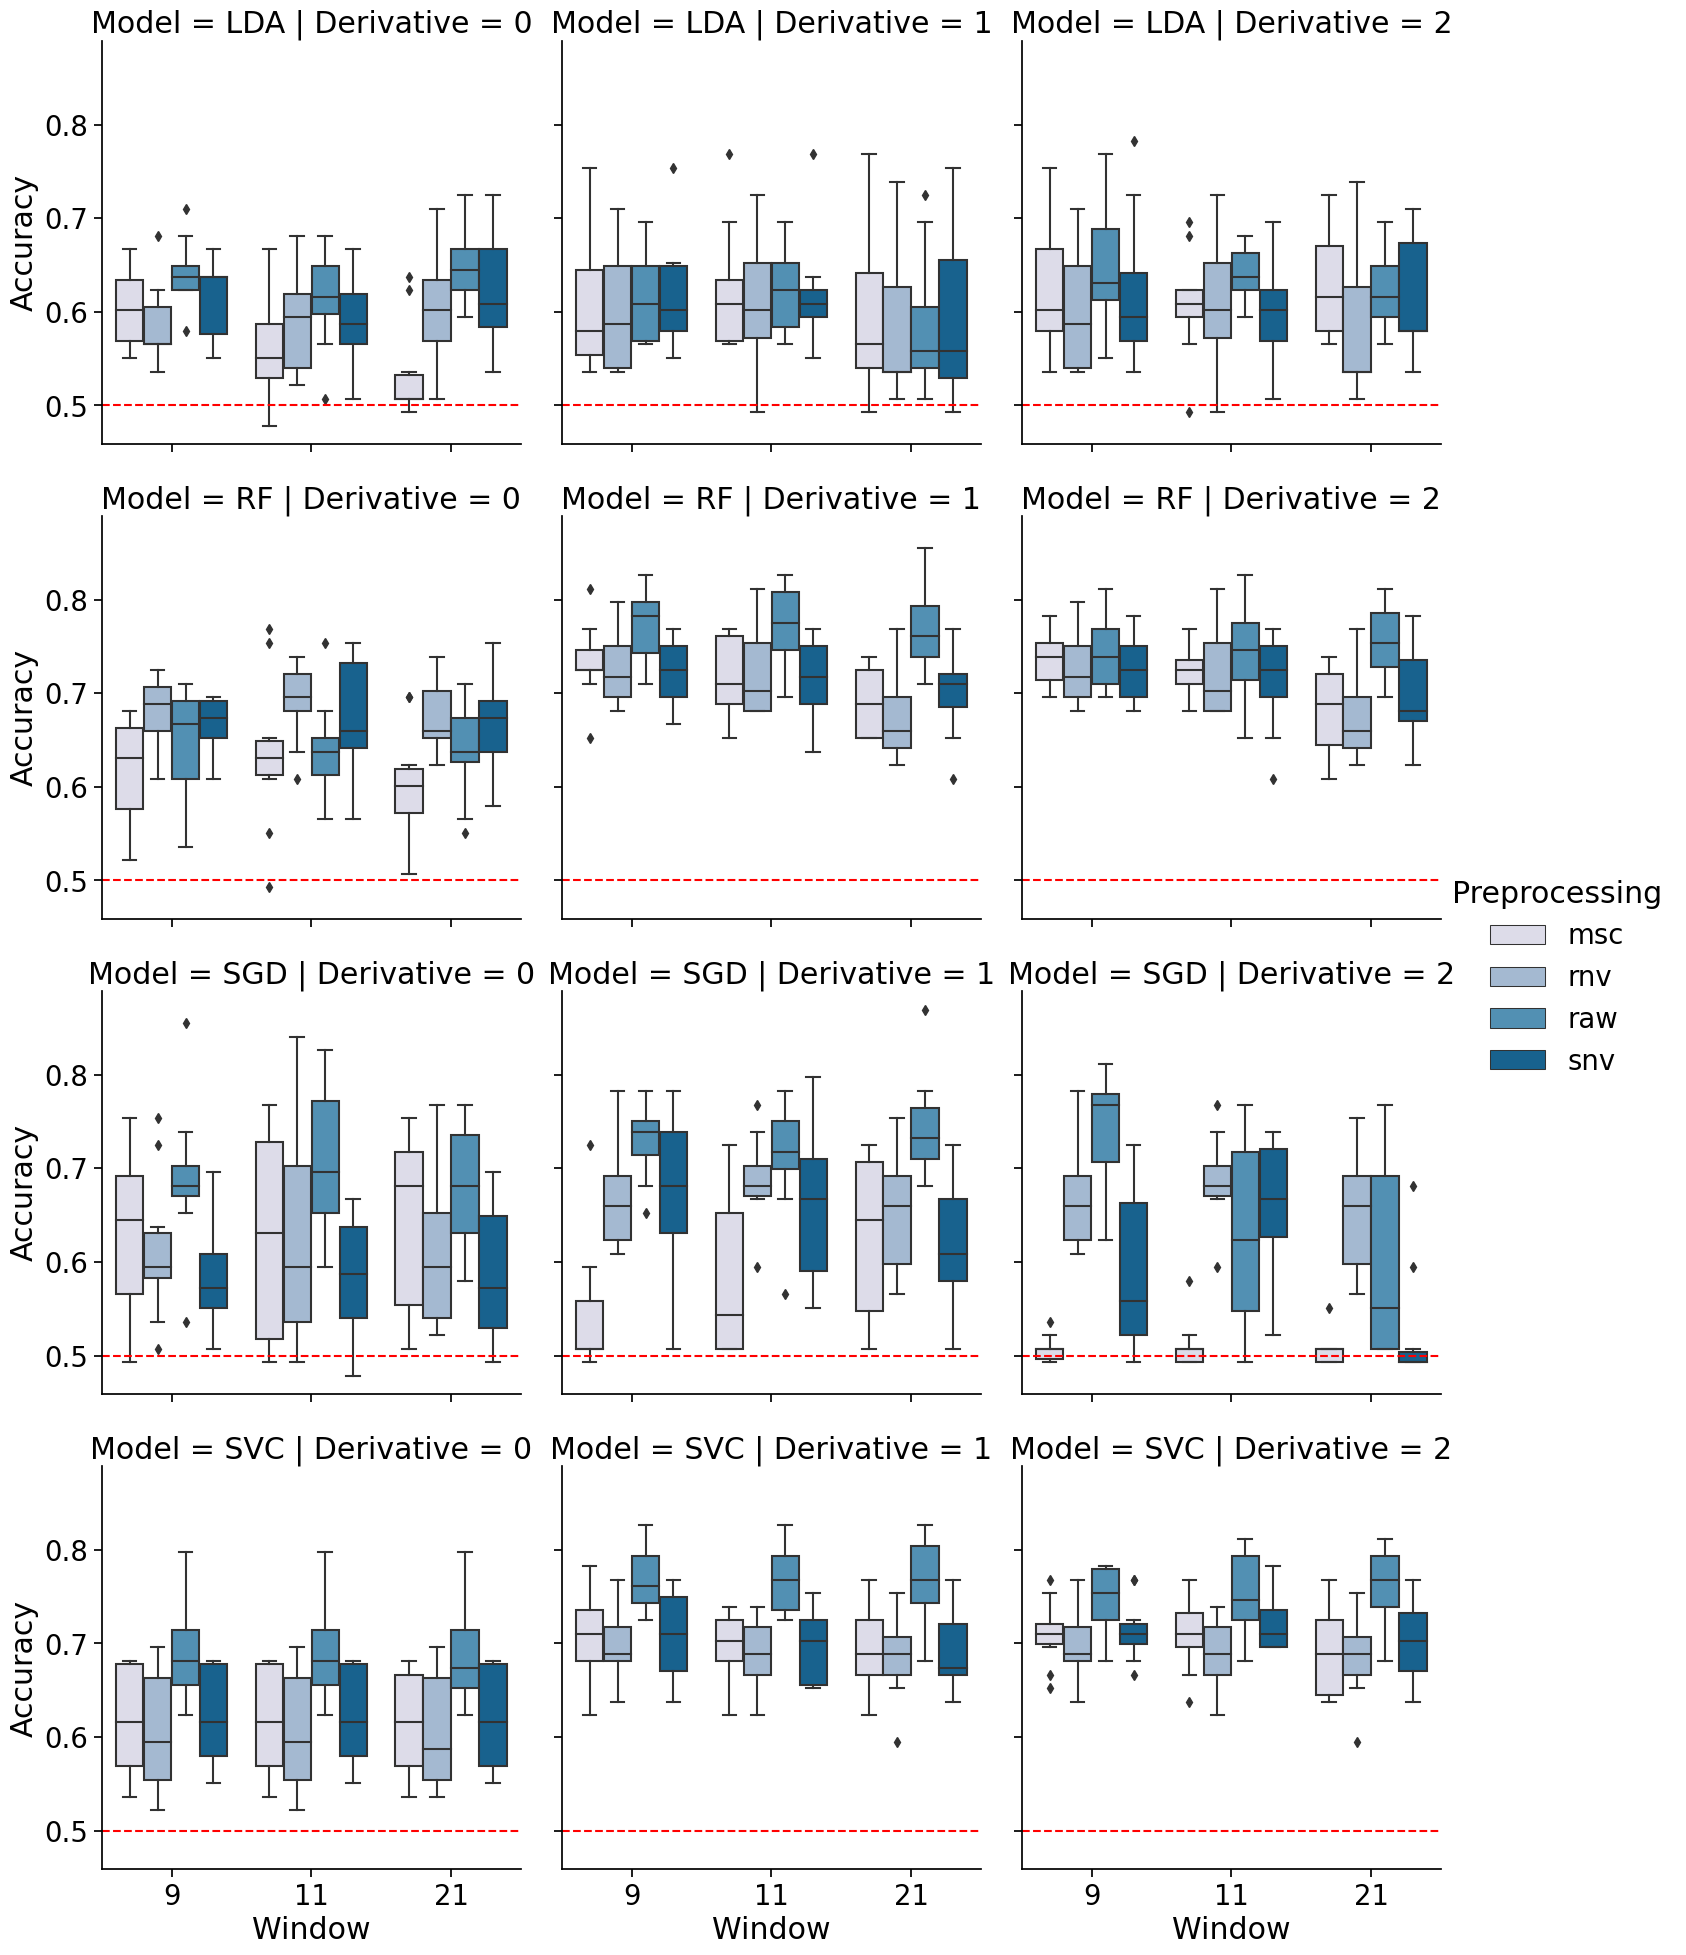

In [21]:
boxplot_preprocessing(preprocesing_final_results.loc[preprocesing_final_results['Model'].isin(['SVC', 'RF', 'LDA', 'SGD'])])
plt.savefig("/Users/mauropazmino/Documents/chapter_2/plots/preprocessing_baseline_InsRes_pt2", bbox_inches="tight", dpi=300)

In [8]:
# model optimization NEEDS TO HAVE MORE PARAMETERS!!!
from optimization import model_optimization_SVC

optimization = model_optimization_SVC(X_tr, y_tr)

Best parameter (CV score=0.738):
{'rf__C': 10, 'rf__gamma': 10, 'rf__kernel': 'rbf'}


In [116]:
optimization

GridSearchCV(estimator=Pipeline(steps=[('derivative',
                                        SavitzkyGolay(deriv_order=1,
                                                      filter_win=11)),
                                       ('rf', SVC(class_weight='balanced'))]),
             n_jobs=2,
             param_grid={'rf__C': [0.1, 1, 10, 100],
                         'rf__gamma': [1, 0.1, 0.01, 0.001],
                         'rf__kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='recall')

In [8]:
optimization.best_estimator_

Pipeline(steps=[('derivative', SavitzkyGolay(deriv_order=1, filter_win=11)),
                ('rf', SVC(C=10, class_weight='balanced', gamma=10))])

In [164]:
# permutation test
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from transformers import SavitzkyGolay

clf = SVC(C=10, gamma=10, kernel='linear', class_weight='balanced')

pipe = Pipeline(steps=[("Savgol", SavitzkyGolay(filter_win=11, deriv_order=1)), ('clf', clf)])

pipe.fit(X_tr, y_tr.ravel())

coef = pipe.named_steps["clf"].coef_






In [165]:
coeficients = pd.DataFrame(coef[0])
coeficients

,0
0,0.280455
1,0.137025
2,0.022887
3,-0.061961
4,-0.117518
...,...
618,0.301557
619,0.182262
620,0.073825
621,-0.023753


In [166]:
Wvn = X.columns.values.tolist()
wavenumbers = [int(x) for x in Wvn]

feature_importance = pd.DataFrame(wavenumbers, columns=["Wavenumbers"])
feature_importance['Importance'] = coef[0]
top20up = feature_importance.sort_values(by='Importance', ascending=False).head(10)
top20down = feature_importance.sort_values(by='Importance', ascending=True).head(10)

In [167]:
top20up

,Wavenumbers,Importance
334,1156,3.450497
333,1158,3.435396
335,1154,3.127417
332,1160,3.072362
415,999,2.816005
414,1001,2.742555
416,998,2.703221
413,1003,2.578708
336,1152,2.558601
331,1161,2.451587


In [168]:
top20down

,Wavenumbers,Importance
52,1700,-3.332457
51,1701,-3.302567
53,1698,-2.775795
50,1703,-2.628643
371,1084,-2.504649
372,1082,-2.393816
424,982,-2.389663
370,1086,-2.285535
425,980,-2.275050
423,984,-2.200485


Text(982, -2, '982')

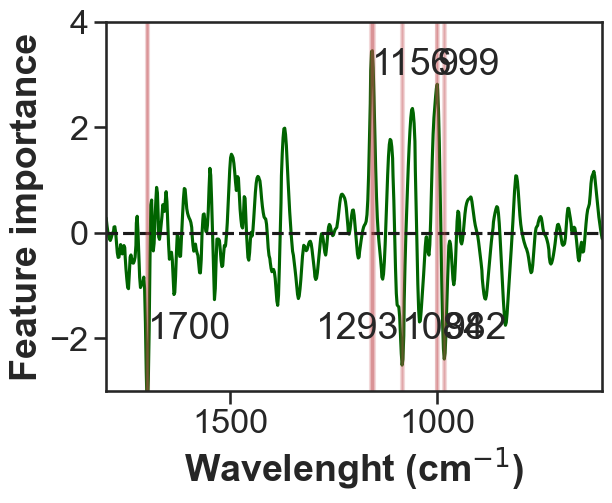

In [170]:
fig, ax = plt.subplots()
ax.plot(wavenumbers, coeficients, color="darkgreen")
ax.set_xlim(1800,600)
ax.set_ylim(-3,4)
ax.set_xlabel('Wavelenght (cm$^{-1}$)', weight='bold')
ax.set_ylabel('Feature importance', weight='bold')
ax.axhline(0, ls='--',color='k')

for index, row in top20up.iterrows():
    ax.axvline(row[0], color='r', alpha=0.2)

for index, row in top20down.iterrows():
    ax.axvline(row[0], color='r', alpha=0.2)

ax.annotate('999', xy=(999,3), xycoords='data')
ax.annotate('1156', xy=(1156,3), xycoords='data')
ax.annotate('1084', xy=(1084,-2), xycoords='data')
ax.annotate('1293', xy=(1293,-2), xycoords='data')
ax.annotate('1700', xy=(1700,-2), xycoords='data')
ax.annotate('982', xy=(982,-2), xycoords='data')








In [ ]:
result = permutation_importance(pipe, X_tr, y_tr.ravel(), n_repeats=10, random_state=123)

In [9]:
from evaluation import model_evaluation_status

evaluation, y_pred, feature_imp = model_evaluation_status(X_tr,y_tr,X_ts,y_ts, optimization)

Accuracy is the model in the hold out set is 0.741


In [10]:
y_ts_labeled = lb.inverse_transform(y_ts)
y_pred_labeled = lb.inverse_transform(y_pred)

              precision    recall  f1-score   support

   Resistant       0.73      0.76      0.75        29
  Suceptible       0.75      0.72      0.74        29

    accuracy                           0.74        58
   macro avg       0.74      0.74      0.74        58
weighted avg       0.74      0.74      0.74        58



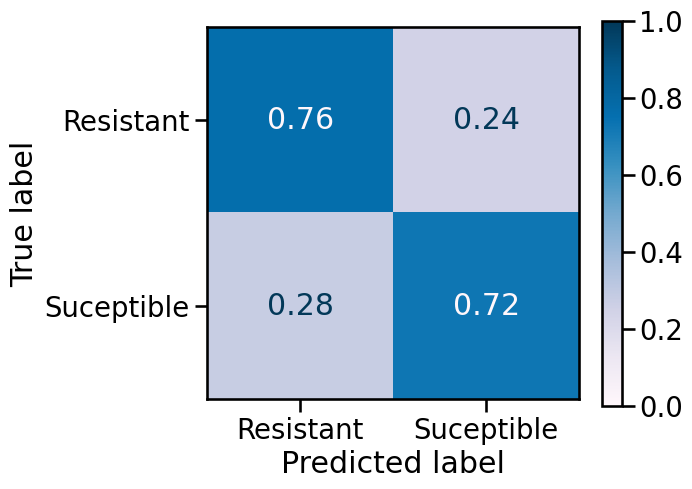

In [11]:
from optimization_evaluation_multi import confusion_matrix_multiclass
confusion_matrix_multiclass(y_ts_labeled, y_pred_labeled)
#plt.savefig("/Users/mauropazmino/Documents/chapter_2/plots/confusion_matrix_nested_species.png", bbox_inches="tight",dpi=300)

## Nested crossvalidation

In [138]:

from evaluation import nested_crossvalidation_status

cm_nested_status, y_pred_status, y_predic_proba_status = nested_crossvalidation_status(X, y_encoded.ravel())

>acc=0.621, est=0.841, cfg={'model__C': 100, 'model__gamma': 10, 'model__kernel': 'linear'}
>acc=0.621, est=0.828, cfg={'model__C': 10, 'model__gamma': 10, 'model__kernel': 'rbf'}
>acc=0.724, est=0.807, cfg={'model__C': 100, 'model__gamma': 0.1, 'model__kernel': 'rbf'}
>acc=0.793, est=0.836, cfg={'model__C': 10, 'model__gamma': 10, 'model__kernel': 'sigmoid'}
>acc=0.828, est=0.820, cfg={'model__C': 10, 'model__gamma': 10, 'model__kernel': 'sigmoid'}
>acc=0.586, est=0.834, cfg={'model__C': 100, 'model__gamma': 0.1, 'model__kernel': 'rbf'}
>acc=0.821, est=0.821, cfg={'model__C': 100, 'model__gamma': 0.1, 'model__kernel': 'rbf'}
>acc=0.821, est=0.830, cfg={'model__C': 1, 'model__gamma': 'scale', 'model__kernel': 'sigmoid'}
>acc=0.714, est=0.817, cfg={'model__C': 10, 'model__gamma': 1, 'model__kernel': 'rbf'}
>acc=0.750, est=0.824, cfg={'model__C': 100, 'model__gamma': 0.1, 'model__kernel': 'rbf'}
Mean accuracy: 0.728 (0.087) and AUC-ROC value: 0.826 (0.009


Mean AUC = 0.823 (0.078)


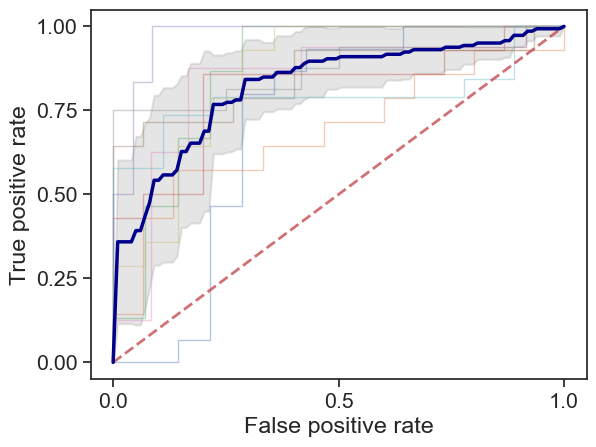

In [139]:
from plotting import nested_ROC_plot

fig, ax = plt.subplots()
nested_ROC_plot(y_predic_proba_status, y_pred_status, ax=ax)
#plt.savefig("/Users/mauropazmino/Documents/chapter_2/plots/rocauc_InsRes.png", bbox_inches="tight",dpi=300)

In [140]:
cm_nested_sum = np.sum(cm_nested_status,axis=0)

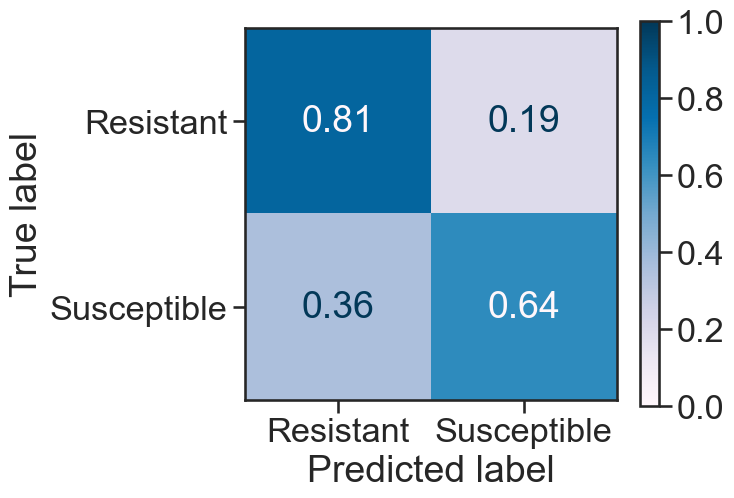

In [141]:
import numpy as np
from optimization_evaluation_multi import confusion_matrix_nested

labels = ["Resistant", "Susceptible"]
confusion_matrix_nested(cm_nested_sum, labels)
#plt.savefig("/Users/mauropazmino/Documents/chapter_2/plots/confusion_matrix_nested_status.png", bbox_inches="tight",dpi=300)

Mean AUC = 0.823 (0.078)


Text(0.0, 1.1, 'b')

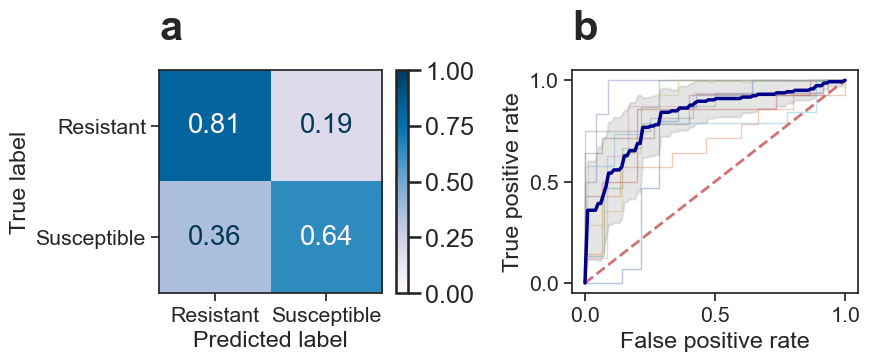

In [143]:
from plotting import confusion_matrix_nested

sn.set(font_scale=1.4)
sn.set_style('ticks')
fig, (ax, ax2) = plt.subplots(1,2, figsize=(9,4), layout='tight')
nested_ROC_plot(y_predic_proba_status, y_pred_status, ax=ax2)
confusion_matrix_nested(cm_nested_sum, labels, ax=ax)

ax.set_title("a", y=1.1, weight='bold',loc='left', fontsize=30)
ax2.set_title("b", y=1.1, weight='bold',loc='left', fontsize=30)

#plt.savefig("/Users/mauropazmino/Documents/chapter_2/plots/confusion_matrix_and_ROC_nested_status.png", bbox_inches="tight",dpi=300)



In [11]:
# sensitivity, specificity and precision

sensitivity = []
specificity = []
precision = []

for i in range(len(cm_nested_status)):
    TP = cm_nested_status[i][1][1]
    TN = cm_nested_status[i][0][0]
    FP = cm_nested_status[i][0][1]
    FN = cm_nested_status[i][1][0]
    sen = (TP / float(TP + FN))
    spe = (TN / float(TN + FP))
    prec = (TP / float(TP + FP))
    sensitivity.append(sen)
    specificity.append(spe)
    precision.append(prec)

print('Sensitivity: %.2f (%.2f)' % (np.mean(sensitivity), np.std(sensitivity)))
print('Specificity: %.2f (%.2f)' % (np.mean(specificity), np.std(specificity)))
print('Precision: %.2f (%.2f)' % (np.mean(precision), np.std(precision)))

insRes_nestedresults = {'sensitivity': np.mean(sensitivity)}

Sensitivity: 0.66 (0.22)
Specificity: 0.81 (0.09)
Precision: 0.79 (0.14)


In [12]:
index = ['Sensitivity', 'Specificity', "Precision"]
df = {'Mean': [np.mean(sensitivity), np.mean(specificity), np.mean(precision)], 'std': [np.std(sensitivity), np.std(specificity), np.std(precision)]}
insRes_nestedresults = pd.DataFrame(data=df, index=index)

In [13]:
insRes_nestedresults

,Mean,std
Sensitivity,0.657553,0.222359
Specificity,0.813896,0.094703
Precision,0.786043,0.135187


Mean AUC = 0.823 (0.078)


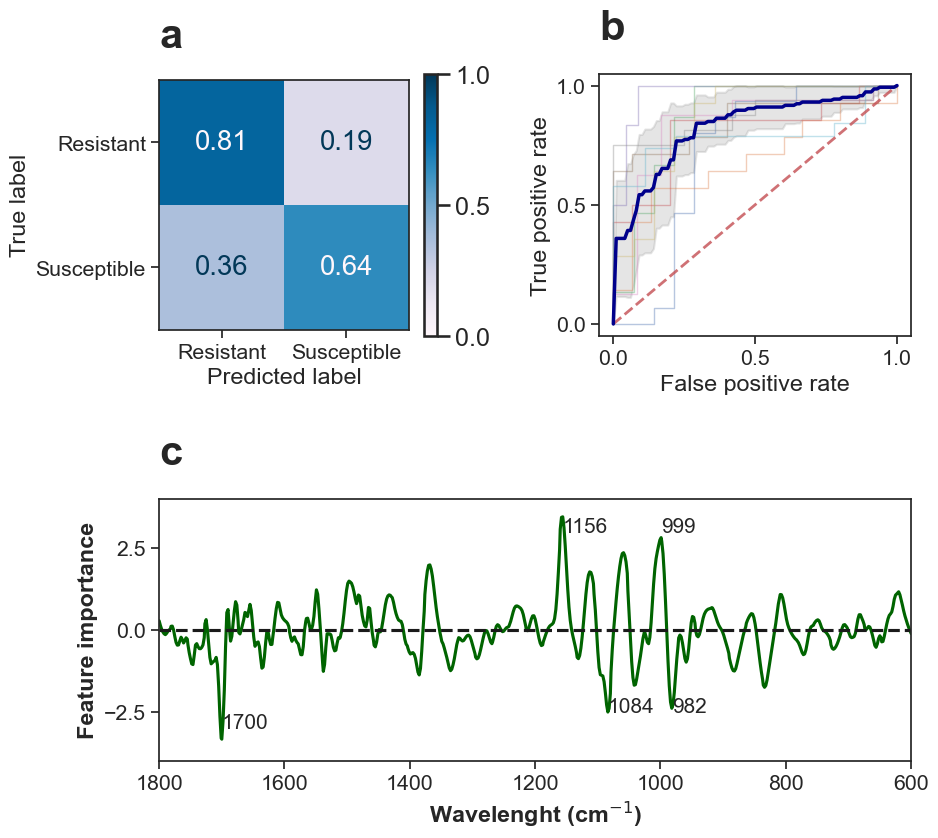

In [175]:
outer = [['left','right'],
        ['bottom', 'bottom']]

sn.set(font_scale=1.4)
sn.set_style('ticks')

fig, axd = plt.subplot_mosaic(outer, figsize=(10,9),layout='tight')
fonts_wavenumbers = 15


confusion_matrix_nested(cm_nested_sum, labels, ax=axd['left'])
nested_ROC_plot(y_predic_proba_status, y_pred_status, ax=axd['right'])
axd['bottom'].plot(wavenumbers, coeficients, color="darkgreen")
axd['bottom'].set_xlim(1800,600)
axd['bottom'].set_ylim(-4,4)
axd['bottom'].set_xlabel('Wavelenght (cm$^{-1}$)', weight='bold')
axd['bottom'].set_ylabel('Feature importance', weight='bold')
axd['bottom'].axhline(0, ls='--',color='k')

axd['bottom'].annotate('999', xy=(999,3), xycoords='data', fontsize=fonts_wavenumbers)
axd['bottom'].annotate('1156', xy=(1156,3), xycoords='data',fontsize=fonts_wavenumbers)
axd['bottom'].annotate('1084', xy=(1084,-2.5), xycoords='data',fontsize=fonts_wavenumbers)

axd['bottom'].annotate('1700', xy=(1700,-3), xycoords='data',fontsize=fonts_wavenumbers)
axd['bottom'].annotate('982', xy=(982,-2.5), xycoords='data',fontsize=fonts_wavenumbers)

labeles = ['a','b','c']
for k, l in zip(axd, labeles):
    axd[k].set_title(l,y=1.1,weight='bold',loc='left', fontsize=30)

fig.savefig("../plots/figure_3_manuscript.png", dpi=300, bbox_inches='tight')





## MULTICLASS STRAIN

Classification between the three diferent strains

In [4]:
# load data
X_strain = pd.read_csv("/Users/mauropazmino/Documents/chapter_2/data/processed/X_strains.csv")
y_strain_mod = pd.read_csv("/Users/mauropazmino/Documents/chapter_2/data/processed/y_strains.csv")

In [5]:
replace_values = {'AK' : "Kisumu", 'AN' : "Ngousso", 'AT' : 'Tiassale' }                                                                                          
y_strain = y_strain_mod.replace({"Species": replace_values})

In [6]:
# train test split
seed = 7
Xs_tr, Xs_ts, ys_tr, ys_ts = train_test_split(X_strain, y_strain, test_size=0.2, random_state=seed)

In [15]:
from optimization_evaluation_multi import model_optimization_SVC_multiclass

diagram, diagram_grid = model_optimization_SVC_multiclass(Xs_tr, ys_tr.values.ravel())

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameter (CV score=0.564):
{'rf__C': 100, 'rf__gamma': 1, 'rf__kernel': 'linear'}


In [16]:
diagram_grid.best_params_

{'rf__C': 100, 'rf__gamma': 1, 'rf__kernel': 'linear'}

In [22]:
from optimization_evaluation_multi import model_evaluation_SVC_multiclass

eval_score, y_pred, model_coefficients = model_evaluation_SVC_multiclass(Xs_tr,ys_tr.values.ravel(),Xs_ts,ys_ts.values.ravel(), diagram_grid)


In [18]:
eval_score

0.509090909090909

In [29]:
y_strain_mod

,Species
0,AK
1,AK
2,AK
3,AK
4,AK
...,...
268,AN
269,AN
270,AN
271,AN


              precision    recall  f1-score   support

      Kisumu       0.83      0.26      0.40        19
     Ngousso       0.56      0.53      0.54        19
    Tiassale       0.42      0.76      0.54        17

    accuracy                           0.51        55
   macro avg       0.60      0.52      0.49        55
weighted avg       0.61      0.51      0.49        55



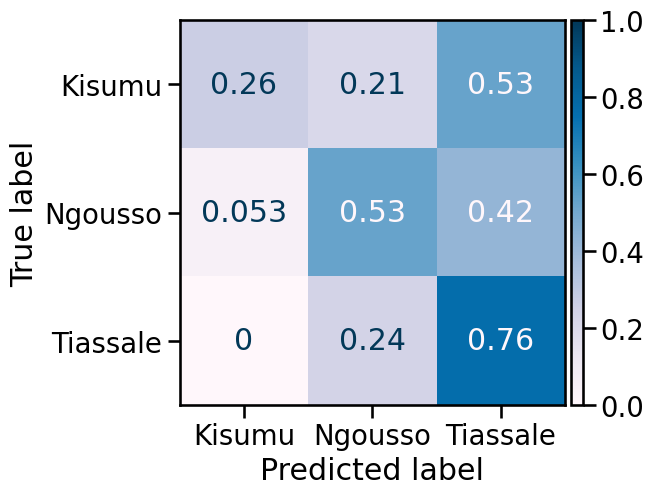

In [20]:
from optimization_evaluation_multi import confusion_matrix_multiclass
sn.set_context(font_scale=1.5)
confusion_matrix_multiclass(ys_ts, y_pred)
plt.savefig("/Users/mauropazmino/Documents/chapter_2/plots/cm_multiclass.pdf",bbox_inches="tight",dpi=600)

In [109]:
example = pd.read_csv("../data/raw/348-AC-10D-LG-LG.dpt", sep='\t', header=None)
i = 1139

example.iloc[1139:1762,1]

1139    0.12624
1140    0.12695
1141    0.12692
1142    0.12627
1143    0.12654
         ...   
1757    0.49593
1758    0.49978
1759    0.50359
1760    0.50678
1761    0.50954
Name: 1, Length: 623, dtype: float64

In [31]:
wave = X_strain.columns.values.tolist()
wavenumbers = [int(x) for x in wave]

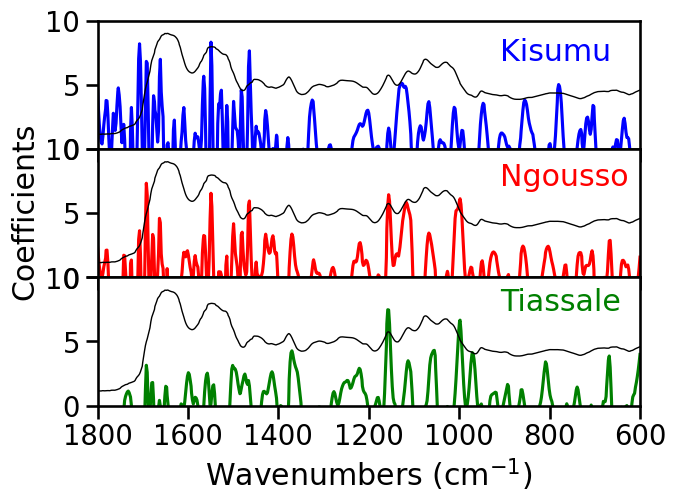

In [108]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(7,5), sharex=True, sharey=True)
ax1.plot(wavenumbers, model_coefficients[0], color='blue', label='Kisumu')
ax1.plot(wavenumbers, example.iloc[1139:1762,1]*9, color='k', linewidth=1)

ax2.plot(wavenumbers, model_coefficients[1], color='red', label='Ngousso')
ax2.plot(wavenumbers, example.iloc[1139:1762,1]*9, color='k', linewidth=1)


ax3.plot(wavenumbers, model_coefficients[2], color='green', label='Tiassale')
ax3.plot(wavenumbers, example.iloc[1139:1762,1]*9, color='k', linewidth=1)


ax1.set_ylim(0,10)
ax2.set_xlim(1800,600)
fig.subplots_adjust(hspace=0)
#fig.legend(bbox_to_anchor = (1.2,1), loc='upper right')
ax3.set_xlabel("Wavenumbers (cm$^{-1}$)")
fig.text(x=0,y=0.5, s='Coefficients', rotation=90, verticalalignment='center')

fig.text(x=0.7, y=0.8, s='Kisumu', color='b')
fig.text(x=0.7, y=0.55, s='Ngousso', color='r')
fig.text(x=0.7, y=0.3, s='Tiassale', color='g')

plt.savefig("/Users/mauropazmino/Documents/chapter_2/plots/multiclass_coefficients.pdf",bbox_inches="tight",dpi=600)



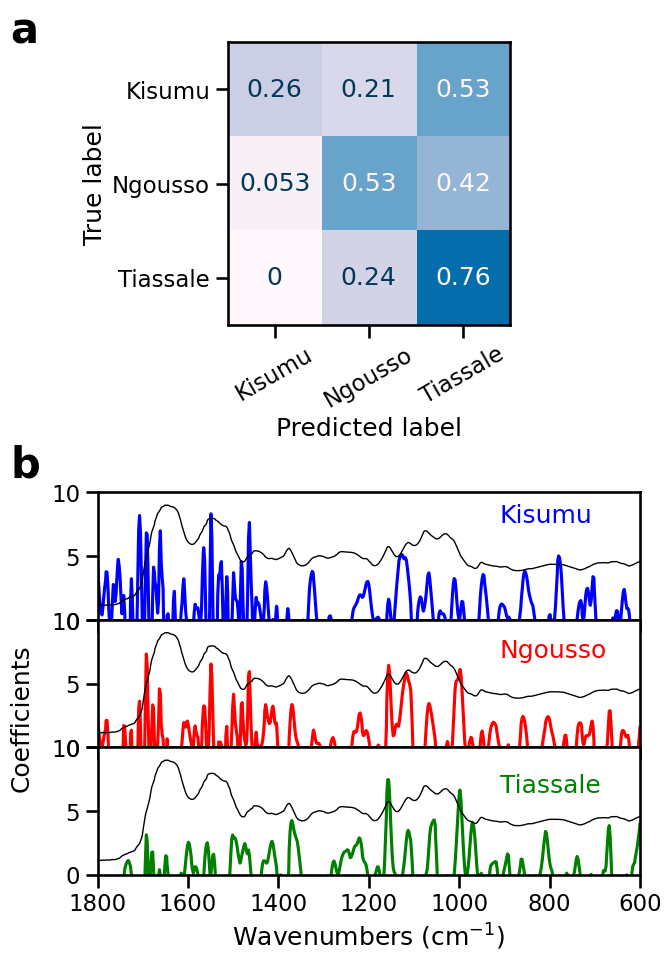

In [289]:
from optimization_evaluation_multi import confusion_matrix_multiclass2

gs_top = plt.GridSpec(3, 1, top=0.75)
gs_base = plt.GridSpec(4, 1, top=0.45, hspace=0)

fig = plt.figure(figsize=(7,15))

ax = fig.add_subplot(gs_top[0,:])

ax2 = fig.add_subplot(gs_base[0,0])
ax3 = fig.add_subplot(gs_base[1,0])
ax4 = fig.add_subplot(gs_base[2,0])

ax2.plot(wavenumbers, model_coefficients[0], color='blue', label='Kisumu')
ax2.plot(wavenumbers, example.iloc[1139:1762,1]*9, color='k', linewidth=1)

ax3.plot(wavenumbers, model_coefficients[1], color='red', label='Ngousso')
ax3.plot(wavenumbers, example.iloc[1139:1762,1]*9, color='k', linewidth=1)


ax4.plot(wavenumbers, model_coefficients[2], color='green', label='Tiassale')
ax4.plot(wavenumbers, example.iloc[1139:1762,1]*9, color='k', linewidth=1)

confusion_matrix_multiclass2(ys_ts, y_pred,ax=ax)

ax2.set_ylim(0,10)
ax2.set_xlim(1800,600)
ax3.set_xlim(1800,600)
ax4.set_xlim(1800,600)
ax3.sharey(ax2)
ax4.sharey(ax2)



ax2.set_xticklabels([])
ax3.set_xticklabels([])


ax4.set_xlabel('Wavenumbers (cm$^{-1}$)')

fig.text(x=0.7, y=0.43, s='Kisumu', color='b')
fig.text(x=0.7, y=0.34, s='Ngousso', color='r')
fig.text(x=0.7, y=0.25, s='Tiassale', color='g')

fig.text(x=0, y=0.75, s='a', fontweight='bold', fontsize=30)
fig.text(x=0, y=0.46, s='b',fontweight='bold', fontsize=30)

fig.text(x=0,y=0.30, s='Coefficients', rotation=90, verticalalignment='center')

#ax.set_xticklabels(("Kisumu", "Ngousso", "Tiassale"), rotation = 45)

fig.savefig('bla.pdf', dpi=600, bbox_inches='tight')